# **2-2. 스토킹 유형 예측**

---
> 13가지 스토킹 행위 유형을 예측합니다.

> 스토킹 잠재/가해자로 판별된 경우에만 유형을 예측하므로, 스토킹 잠재/가해자인 경우의 데이터만을 입력으로 사용해야 합니다.
---

In [1]:
# 드라이브 내 Custom Module 및 .ipynb 파일, 그리고 학습 데이터를 저장한 Directory를 입력하세요.
# 설문조사는 총 11개 문항으로 이루어져 있습니다. 학습을 원하는 문항의 번호를 입력하세요.

DIRECTORY = "AI경진대회" # 여기를 변경하세요.

## **(1) 라이브러리 준비**

In [2]:
!pip install glove-python-binary
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 948 kB 4.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 465 kB 24.3 MB/s 


In [3]:
import os
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from konlpy.tag import Okt
from glove import Corpus, Glove

## **(2) Drive Mount 및 Custom Module 불러오기**

In [4]:
# Drive Mount
from google.colab import drive
drive.mount('/content/gdrive')

# Directory 변경
path = "/content/gdrive/My Drive/" + DIRECTORY
os.chdir(path)

Mounted at /content/gdrive


In [5]:
from utils import stalking_cat

In [7]:
# 학습된 glove 불러오기

glove = Glove.load('./TRAINED_MODEL/GloVe/glove_category.model')

## **(3) 데이터셋 불러오기**

In [8]:
# 데이터셋 준비

data = pd.read_csv('./DATA/Luv.D/경진대회 데이터_수정본.csv')

In [9]:
# 잠재/가해자 데이터 추출

data = data[(data['warning']==1) | (data['warning']==2)]
data = data.iloc[:, 1:-2].reset_index(drop=True)
data.shape

(78, 11)

## **(4) 유형별 분포 DataFrame**

In [10]:
# 13가지 유형별 확률 데이터프레임

new = {'찾아가기': [],
       '접근하기': [],
       '기다리기': [],
       '미행하기': [], 
       '지켜보기': [], 
       '연락 도달하게 하기': [], 
       '두드리기': [], 
       '물건 놓아두기': [], 
       '진로방해': [], 
       '배회하기': [], 
       '지인에게 연락': [], 
       '침입': [], 
       '기타': []}

for j in tqdm(range(data.shape[0])):
    probs = stalking_cat(glove=glove,
                         number=20, 
                         last=data['last'][j],
                         reason=data['reason'][j],
                         action=data['action'][j],
                         try_=data['try'][j],
                         reaction=data['reaction'][j],
                         valuable=data['valuable'][j],
                         start=data['start'][j],
                         charmingLover=data['charmingLover'][j],
                         charmingCustomer=data['charmingCustomer'][j],
                         relation=data['relation'][j],
                         event=data['EVENT'][j])
    for k in range(len(list(new.keys()))):
        new[list(new.keys())[k]].append(probs[k])
        
new = pd.DataFrame(new)
new.head()

100%|██████████| 78/78 [00:01<00:00, 51.20it/s]


,찾아가기,접근하기,기다리기,미행하기,지켜보기,연락 도달하게 하기,두드리기,물건 놓아두기,진로방해,배회하기,지인에게 연락,침입,기타
0,0.019065,0.000000,0.002678,0.000000,0.003034,0.682124,0.009600,0.008926,0.081124,0.146614,0.046835,0.000000,0.000000
1,0.052847,0.000000,0.043550,0.000000,0.041154,0.423073,0.079826,0.000000,0.040587,0.230028,0.039464,0.049472,0.000000
2,0.046850,0.009618,0.003114,0.000000,0.000000,0.630667,0.035698,0.018991,0.059310,0.176699,0.019052,0.000000,0.000000
3,0.050333,0.009068,0.016233,0.000000,0.000000,0.578170,0.053220,0.017569,0.046252,0.189182,0.032276,0.000000,0.007699
4,0.106063,0.000000,0.000000,0.006178,0.005962,0.530752,0.046245,0.007167,0.066666,0.207838,0.017147,0.005983,0.000000


## **(5) 유형별 분포 시각화**

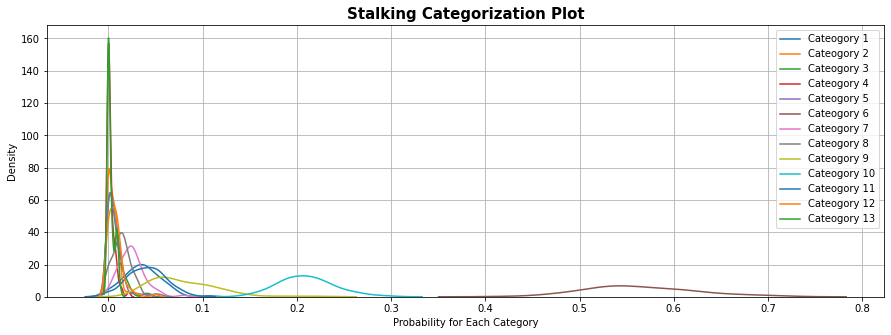

In [13]:
# 모델 학습 결과

f, ax = plt.subplots(figsize=(15, 5))
plt.title("Stalking Categorization Plot", fontsize=15, weight='bold')
plt.xlabel('Probability for Each Category')
sns.kdeplot(new['찾아가기'], label='Cateogory 1')
sns.kdeplot(new['접근하기'], label='Cateogory 2')
sns.kdeplot(new['기다리기'], label='Cateogory 3')
sns.kdeplot(new['미행하기'], label='Cateogory 4')
sns.kdeplot(new['지켜보기'], label='Cateogory 5')
sns.kdeplot(new['연락 도달하게 하기'], label='Cateogory 6')
sns.kdeplot(new['두드리기'], label='Cateogory 7')
sns.kdeplot(new['물건 놓아두기'], label='Cateogory 8')
sns.kdeplot(new['진로방해'], label='Cateogory 9')
sns.kdeplot(new['배회하기'], label='Cateogory 10')
sns.kdeplot(new['지인에게 연락'], label='Cateogory 11')
sns.kdeplot(new['침입'], label='Cateogory 12')
sns.kdeplot(new['기타'], label='Cateogory 13')

plt.legend()
plt.grid(True)